## AIM:
- ### Make prediction with custome build linear regression model on a relatively linear datasets

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_l = pd.read_csv("dataset_l.csv")


In [65]:
df_l.head()

,x,y
0,-1.424647,-1.304362
1,-0.618276,-0.136088
2,1.078416,1.354952
3,-0.448165,-0.714963
4,-1.521853,-1.290329


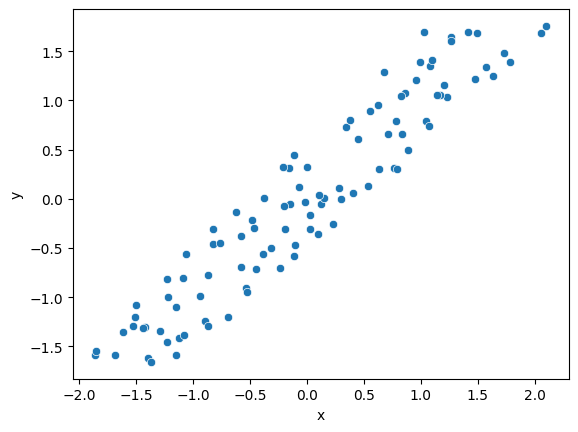

In [ ]:

sns.scatterplot(x  = df_l.x , y= df_l["y"]);

In [67]:
from Linear_regression_code import linear_regression


In [68]:
model = linear_regression(number_of_interation=5000 , alpha=0.01)


In [ ]:
from sklearn.model_selection import train_test_split
x = df_l["x"]
y = df_l["y"]
x_train , x_test, y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=43)


In [70]:
model.fit(x_train , y_train)

In [71]:
prediction = model.predict(x_test)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    """
    Generates a regression model evaluation report.

    Args:
        y_true: Array-like, the true target values.
        y_pred: Array-like, the predicted target values.

    Returns:
        A dictionary containing the evaluation metrics.
    """
    y_true_np = np.array(y_true)
    y_pred_np = np.array(y_pred)
    mae = mean_absolute_error(y_true_np, y_pred_np)
    mse = mean_squared_error(y_true_np, y_pred_np)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_np, y_pred_np)

    report = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
    }

    return report

In [73]:

def plot_actual_vs_predicted(y_true, y_pred):
    """Plots actual vs. predicted values."""
    plt.figure()
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red') #diagonal line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    plt.show()


In [74]:
report = regression_report(y_pred=prediction , y_true=y_test)

In [75]:
# these are the parameters of the model after training on a relatively linear data 
m = model.m
b = model.c

In [76]:
y_line = m*df_l["x"] + b

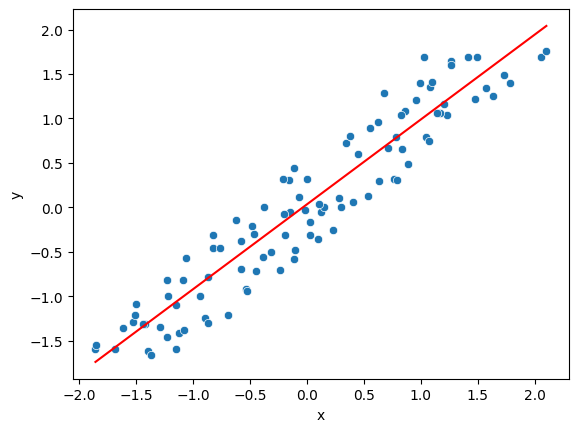

In [77]:
sns.scatterplot(x = df_l["x"] , y = df_l["y"])
sns.lineplot(x = df_l["x"] , y= y_line , color = "red");
# Red line shows the line of prediction or the line that is fits in linear regression

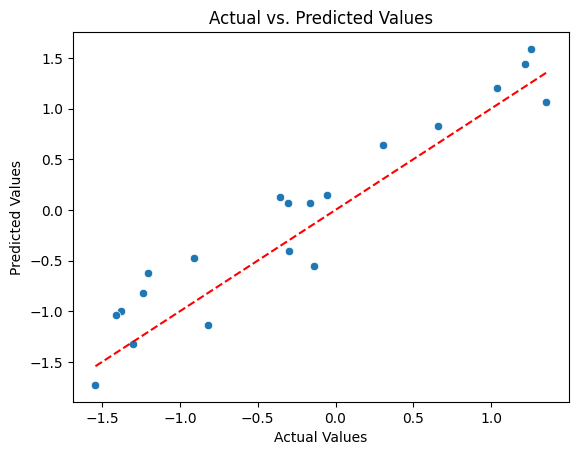

In [78]:
plot_actual_vs_predicted(y_true=y_test , y_pred=prediction)